## Cargamos los archivos de Coursera y verificamos sus propiedades ##

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dfCouCou = pd.read_csv('../Moocs/Coursera_courses.csv')
dfCouRev = pd.read_csv('../Moocs/Coursera_reviews.csv')
print('Cantidad de filas: ' + str((len(dfCouCou))))
dfCouCou.head()

Cantidad de filas: 623


,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [115]:
print('Cantidad de filas: ' + str(len(dfCouRev)))
dfCouRev.head()

Cantidad de filas: 1454711


,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [116]:
dfCouCou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [117]:
dfCouRev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


## Obtenemos el promedio del rating por id de curso. ##

In [118]:
#Removemos reviews duplicadas.
dfDupesRev = dfCouRev.drop_duplicates()
print('Cantidad de filas: ' + str(len(dfDupesRev)))

Cantidad de filas: 519947


In [119]:
dfCouMeanCount = dfDupesRev.groupby('course_id') \
       .agg({ 'reviewers':'size','rating':'mean'}) \
       .rename(columns={'text':'count','sent':'rating'}) \
       .reset_index()
print('Cantidad de filas: ' + str(len(dfCouMeanCount)))
dfCouMeanCount.head()

Cantidad de filas: 604


,course_id,reviewers,rating
0,aboriginal-education,67,4.552239
1,access-control-sscp,45,4.466667
2,accounting-analytics,468,4.395299
3,accounting-data-analytics-python,8,3.500000
4,actualizacion-manejo-diabetes-tipo-2,253,4.845850


### Verificamos la ditribucion del rating ###

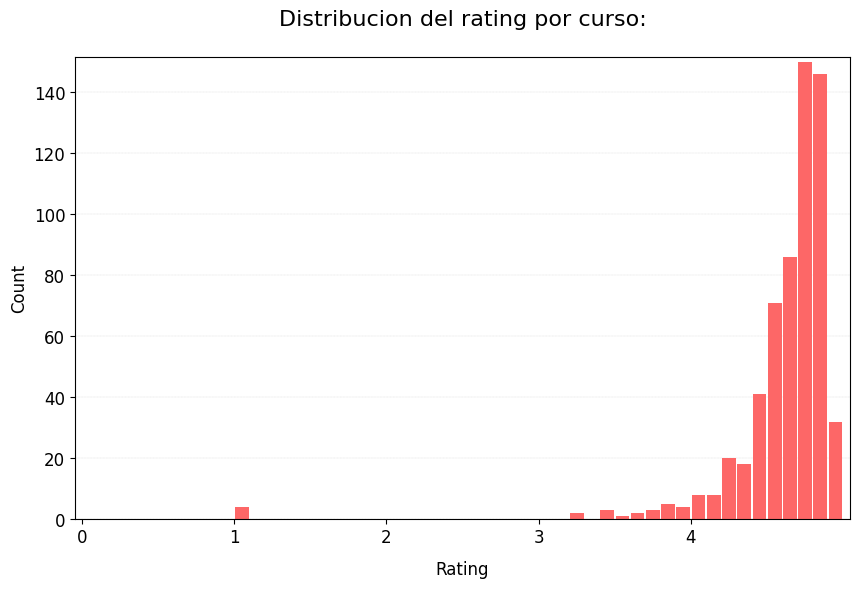

In [143]:
plt.rcParams.update({'font.size': 12, 'axes.axisbelow': True})
plt.figure(figsize = (10, 6))
plt.hist(dfCouMeanCount['rating'],bins=50,range=(0,5), rwidth=0.9,
         color='#fd6767')
plt.grid(axis='y', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,5,1))
plt.margins(0.01)
plt.xlabel("Rating", labelpad=10)
plt.ylabel("Count")
plt.title('Distribucion del rating por curso:\n',loc='center', fontdict={'fontsize': 16})
plt.show()

### Unificamos las tablas de cursos y reviews ###

In [121]:
dfmerge = pd.merge(dfCouCou, dfCouMeanCount, on="course_id")
print('Cantidad de filas: ' + str(len(dfmerge)))
dfmerge.head()

Cantidad de filas: 604


,name,institution,course_url,course_id,reviewers,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,12677,4.739923
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,1460,4.816438
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,8199,4.929504
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,12055,4.767482
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,33,4.818182


### Obtenemos datos varios para una mejor comprensión del dataset. ###

In [122]:
print('Cantidad de cursos: ' + str(len(pd.unique(dfmerge['name'].sort_values()))))
print('Cantidad de instituciones: ' + str(len(pd.unique(dfmerge['institution'].sort_values()))))

Cantidad de cursos: 603
Cantidad de instituciones: 132


In [136]:
e_df = dfmerge.groupby(['institution'], as_index=False).size().sort_values(by='size',ascending=False)
print('Top 10 Institutos por cantidad de cursos: \n')
print(e_df[:10].to_markdown(tablefmt="rounded_outline", index=False))

Top 10 Institutos por cantidad de cursos: 

institution                                   size
------------------------------------------  ------
University of Pennsylvania                      43
University of Michigan                          31
Duke University                                 23
Google Cloud                                    22
IBM                                             18
University of Virginia                          17
Yale University                                 17
DeepLearning.AI                                 16
University of California, Irvine                15
University of Illinois at Urbana-Champaign      14


In [124]:
%matplotlib inline

e_df = dfmerge.sort_values(by=['rating'],ascending=False)
e_df = e_df[['name','rating']]
print('Top 10 Cursos por Rating: \n')
print(e_df[:10].to_markdown(tablefmt="rounded_outline", index=False))


Top 10 Cursos por Rating: 

name                                                                                               rating
-----------------------------------------------------------------------------------------------  --------
Entreprise et changement climatique                                                               5
Building Modern Python Applications on AWS                                                        5
Removing Barriers to Change                                                                       5
How to Manage a Remote Team                                                                       5
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho                          4.968
Bugs 101: Insect-Human Interactions                                                               4.96296
Build a Modern Computer from First Principles: Nand to Tetris Part II (project-centered course)   4.95699
Everyday Excel, Part 2                      

In [125]:
e_df = dfmerge.sort_values(by=['rating'],ascending=False)
e_df = e_df[['institution','rating']]
print('Top 10 Institutos por Rating de su mejor curso: \n')
print(e_df[:10].to_markdown(tablefmt="rounded_outline", index=False))

Top 10 Institutos por Rating de su mejor curso: 

institution                       rating
------------------------------  --------
ESSEC Business School            5
Amazon Web Services              5
University of Pennsylvania       5
GitLab                           5
Universidad Austral              4.968
University of Alberta            4.96296
Hebrew University of Jerusalem   4.95699
University of Colorado Boulder   4.95
Yale University                  4.92953
Yale University                  4.9295


In [126]:
e_df = dfmerge.groupby('institution')['rating'].mean()
print('Top 10 Institutos por promedio de Rating de sus cursos:')
e_df.head(10).sort_values(ascending=False)

Top 10 Institutos por promedio de Rating de sus cursos:


institution
Berklee College of Music                  4.810011
BCG                                       4.804887
American Museum of Natural History        4.734177
Arizona State University                  4.729209
Atlassian                                 4.705372
Autodesk                                  4.700935
Advancing Women in Product                4.600000
Alberta Machine Intelligence Institute    4.569660
Amazon Web Services                       4.514876
(ISC)²                                    4.466667
Name: rating, dtype: float64

In [133]:
print('Cantidad de cursos con reviews menores a 1: ' + str(len(dfmerge[dfmerge['rating'] < 1])))
print('Cantidad de cursos con reviews menores a 2: ' + str(len(dfmerge[dfmerge['rating'] < 2])))
print('Cantidad de cursos con reviews menores a 3: ' + str(len(dfmerge[dfmerge['rating'] < 3])))
print('Cantidad de cursos con reviews menores a 4: ' + str(len(dfmerge[dfmerge['rating'] < 4])))
print('Cantidad de cursos con reviews menores a 5: ' + str(len(dfmerge[dfmerge['rating'] < 5])))

Cantidad de cursos con reviews menores a 1: 0
Cantidad de cursos con reviews menores a 2: 4
Cantidad de cursos con reviews menores a 3: 4
Cantidad de cursos con reviews menores a 4: 24
Cantidad de cursos con reviews menores a 5: 600


# Conclusion #

Con este dataset podemos observar que la gran mayoría de las reviews y ratings son positivas, pareciera ser que a los cursantes en general le gustan estos cursos o no se interesan en dejar reviews y ratings negativos. <br>
Además podemos encontrar en el listado "Top 10 Institutos por promedio de Rating de sus cursos" cuales son los isntitutos que ofrecen los cursos que mas agradan a los cursantes.

Escribir cursos para wordcloud

In [137]:
import csv   

with open(r'../Power Bi/wordCloud.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(dfmerge['name'])

In [138]:
dfmerge.to_csv('../Power Bi/Coursera.csv',index=False)